## 1.载入数据集

In [1]:

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


def load_data():
    data = load_digits()
    x, y = data.data, data.target
    x_train, x_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.3, random_state=20)
    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.transform(x_test)
    return x_train, x_test, y_train, y_test

## 2.可视化样本

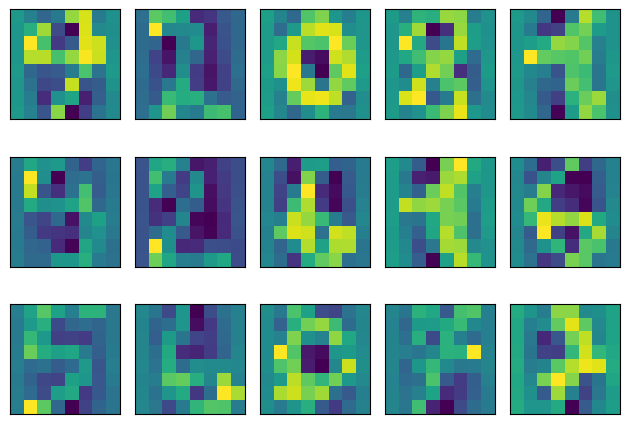

In [2]:
def visualization(x):
    images = x.reshape(-1, 8, 8)  # reshape成一张图片的形状
    fig, ax = plt.subplots(3, 5)
    for i, axi in enumerate(ax.flat):
        image = images[i]
        # axi.imshow(image,cmap='gray')
        axi.imshow(image)
        axi.set(xticks=[], yticks=[])
    plt.tight_layout()
    plt.show()

x_train, x_test, y_train, y_test = load_data()
visualization(x_train)

## 3.交叉验证模型选择

In [3]:
def model_selection(X, y, k=5):
    learning_rates = [0.001, 0.03, 0.01, 0.03, 0.1, 0.3, 1, 3]
    penalties = [0, 0.01, 0.03, 0.1, 0.3, 1, 3]
    all_models = []
    model_id = 1
    for learning_rate in learning_rates:
        for penalty in penalties:
            print(f"正在训练模型 {model_id}: learning_rate = {learning_rate}, penalty = {penalty}")
            model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='constant',
                                  eta0=learning_rate, alpha=penalty)
            kf = KFold(n_splits=k, shuffle=True, random_state=10)
            model_score = []
            for train_index, dev_index in kf.split(X):
                X_train, X_dev = X[train_index], X[dev_index]
                y_train, y_dev = y[train_index], y[dev_index]
                model.fit(X_train, y_train)
                s = model.score(X_dev, y_dev)
                model_score.append(s)
            model_id += 1
            all_models.append([np.mean(model_score), learning_rate, penalty])
    print("最优模型: ", sorted(all_models, reverse=True, key=lambda x: x[0])[0])



## 4.运行结果模型选择

In [4]:
if __name__ == '__main__':
    x_train, x_test, y_train, y_test = load_data()
    model_selection(x_train, y_train)

正在训练模型 1: learning_rate = 0.001, penalty = 0
正在训练模型 2: learning_rate = 0.001, penalty = 0.01
正在训练模型 3: learning_rate = 0.001, penalty = 0.03
正在训练模型 4: learning_rate = 0.001, penalty = 0.1
正在训练模型 5: learning_rate = 0.001, penalty = 0.3
正在训练模型 6: learning_rate = 0.001, penalty = 1
正在训练模型 7: learning_rate = 0.001, penalty = 3
正在训练模型 8: learning_rate = 0.03, penalty = 0
正在训练模型 9: learning_rate = 0.03, penalty = 0.01
正在训练模型 10: learning_rate = 0.03, penalty = 0.03
正在训练模型 11: learning_rate = 0.03, penalty = 0.1
正在训练模型 12: learning_rate = 0.03, penalty = 0.3
正在训练模型 13: learning_rate = 0.03, penalty = 1
正在训练模型 14: learning_rate = 0.03, penalty = 3
正在训练模型 15: learning_rate = 0.01, penalty = 0
正在训练模型 16: learning_rate = 0.01, penalty = 0.01
正在训练模型 17: learning_rate = 0.01, penalty = 0.03
正在训练模型 18: learning_rate = 0.01, penalty = 0.1
正在训练模型 19: learning_rate = 0.01, penalty = 0.3
正在训练模型 20: learning_rate = 0.01, penalty = 1
正在训练模型 21: learning_rate = 0.01, penalty = 3
正在训练模型 22: learning_rate = 

In [5]:
if __name__ == '__main__':
    model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='constant', eta0=0.03, alpha=0.0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))#

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.96      0.96      0.96        56
           2       1.00      0.95      0.98        44
           3       0.98      0.90      0.94        63
           4       0.94      0.97      0.95        60
           5       0.93      0.98      0.95        51
           6       1.00      0.97      0.98        59
           7       0.96      0.96      0.96        53
           8       0.92      0.94      0.93        52
           9       0.93      0.96      0.94        52

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

